In [25]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('aud_data.csv',delimiter=';')

In [27]:
df.head()

,Date,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f24,m1,m2,m3,m4,m5,m6,m7,m8,target
0,31.12.2018,0.2,0.4,-1.0,1.8,-0.7,0.1,0.3,1.2,1.1,...,0.2,5646.3999,6.5999,2.318,1.906,1.900,1.638,-0.75,40.15,0.7049
1,30.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5654.3242,6.5981,2.362,1.942,1.934,1.647,-0.70,40.95,0.7047
4,27.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5597.2378,6.5850,2.378,1.953,1.953,1.646,-1.35,40.20,0.7033


In [28]:
df['Date']=pd.to_datetime(df['Date'], dayfirst = True)

In [29]:
df=df.set_index('Date')

In [30]:
fundamentals=df[[col for col in df.columns if 'f' in col]].columns.tolist()
market=df[[col for col in df.columns if 'm' in col]].columns.tolist()

In [31]:
df[fundamentals]=df[fundamentals].apply(lambda x: x.fillna(method='bfill').fillna(0), axis=0)

In [32]:
market_data=df[market][df.index.dayofweek<5]

In [33]:
market_data.info()
# m6 has half of the data abscent

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7306 entries, 2018-12-31 to 1990-12-31
Data columns (total 8 columns):
m1     6733 non-null float64
m2     7306 non-null float64
m3     7291 non-null float64
m4     7161 non-null float64
m5     7179 non-null float64
m6     3550 non-null float64
m7     4962 non-null float64
m8     4966 non-null float64
dtypes: float64(8)
memory usage: 513.7 KB


## Dealing with outliers

In [35]:
def remove_outliers(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    return data[(data>(Q1-1.5*IQR)) & (data<(Q3+1.5*IQR))]

In [36]:
new_md=pd.DataFrame(index=market_data.index, columns=market_data.columns)

In [37]:
market_data=market_data.pct_change(periods=1,fill_method=None)

In [38]:
for col in new_md.columns:
    m=remove_outliers(market_data[col])
    new_md[col].loc[m.index,]=m

In [39]:
new_md

,m1,m2,m3,m4,m5,m6,m7,m8
Date,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,0.00140343,-0.000272731,0.0189819,0.0188877,0.0178947,0.00549451,-0.0666667,0.0199253
2018-12-27,-0.0100961,-0.00198542,0.00677392,0.00566426,0.0098242,-0.000607165,NaN,-0.018315
2018-12-26,NaN,0.00469248,-0.00630782,-0.00972862,-0.0030722,-0.0109356,NaN,0.0437811
2018-12-25,NaN,-0.00424734,0,0,0,0.017199,0,0
2018-12-24,NaN,0.00183673,0,0,0,0,0,-0.000238322
2018-12-21,-0.00476184,-0.00127275,0.0101566,0.0186143,0.0133539,0.00362319,NaN,-0.0297974
2018-12-20,0.00698338,0.00966396,-0.0188521,-0.0172589,-0.0212874,-0.00481348,NaN,0.014742
2018-12-19,0.013581,0.000135233,0.0183604,0.0206612,0.00725013,0.00785973,NaN,-0.0569007


In [40]:
new_md.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7306 entries, 2018-12-31 to 1990-12-31
Data columns (total 8 columns):
m1     6335 non-null object
m2     7004 non-null object
m3     6945 non-null object
m4     6736 non-null object
m5     6706 non-null object
m6     3222 non-null object
m7     4121 non-null object
m8     4165 non-null object
dtypes: object(8)
memory usage: 833.7+ KB


In [41]:
market_data=new_md.fillna(method='bfill').fillna(method='ffill')

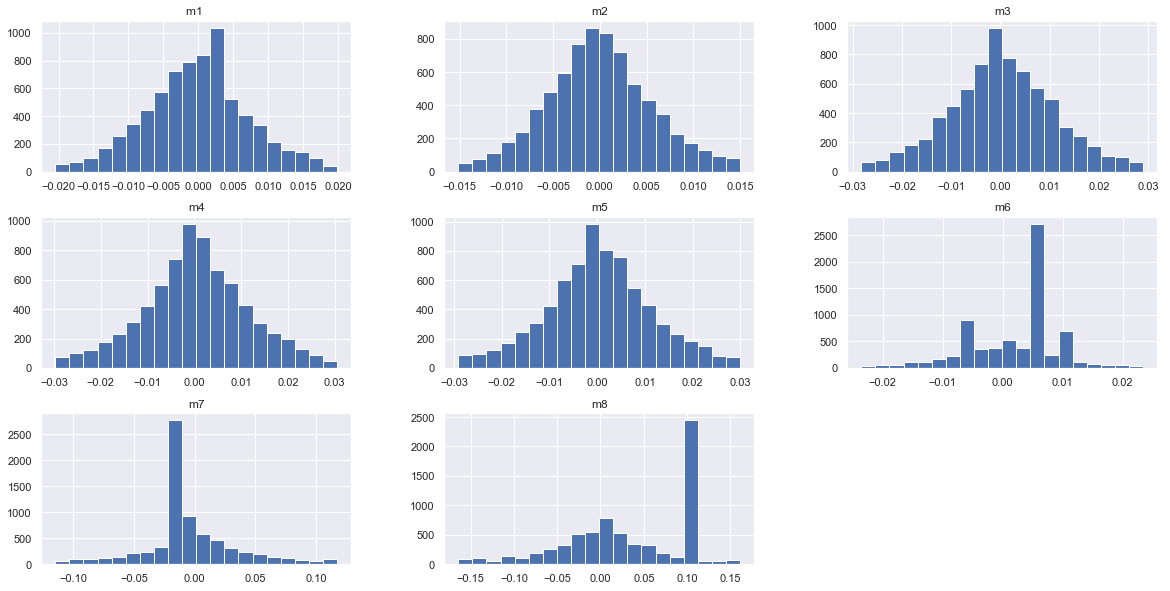

In [42]:
market_data.hist(figsize=(20, 10), bins=20);

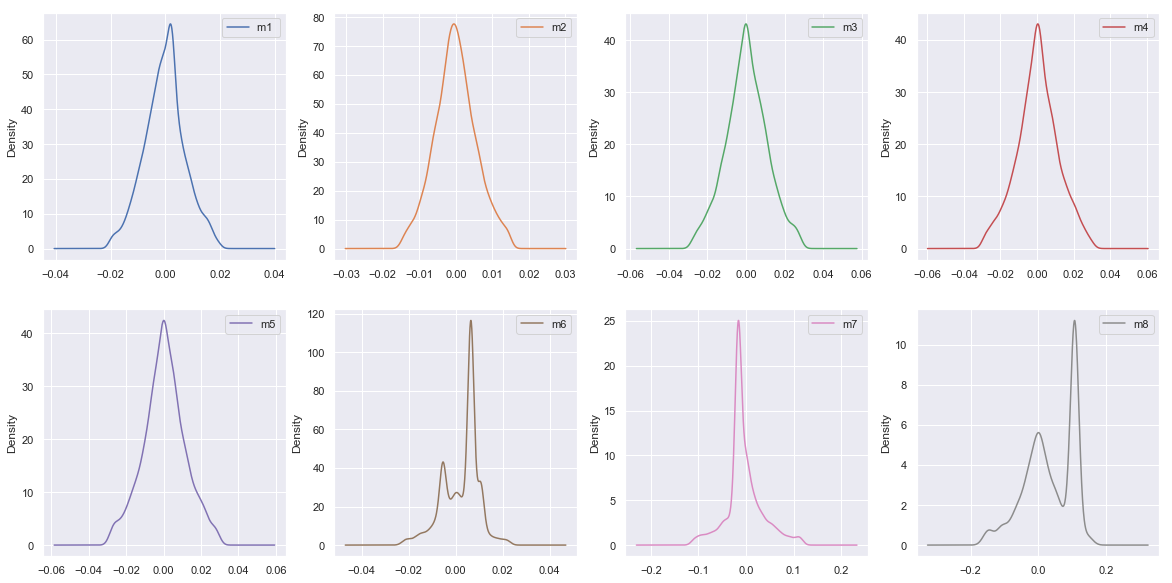

In [43]:
market_data.plot(kind='density', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

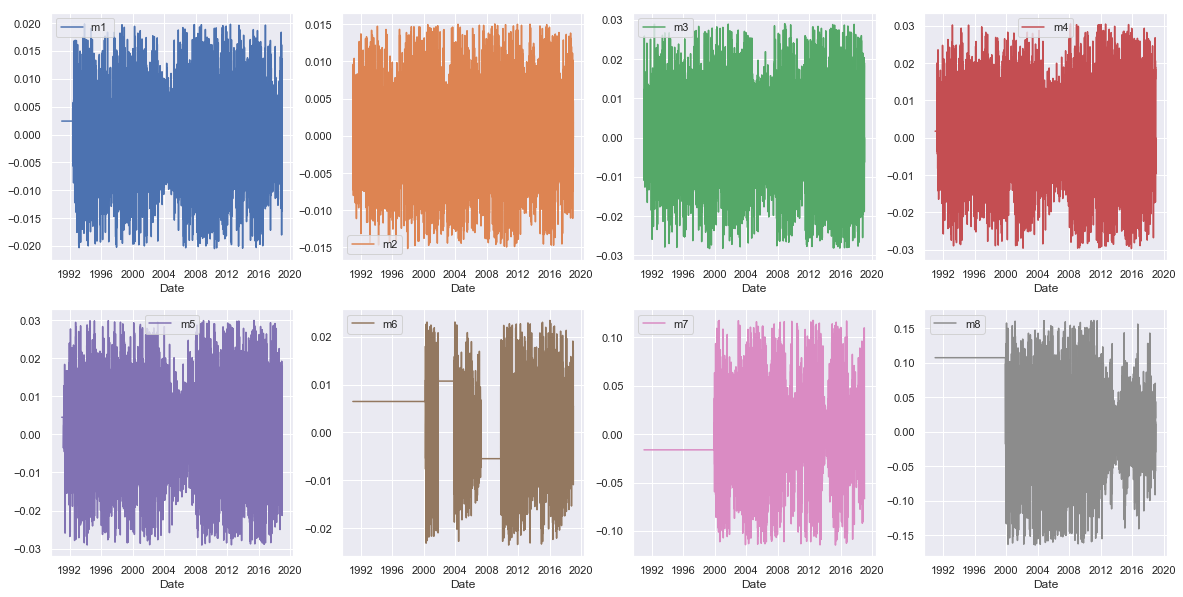

In [44]:
market_data.plot(kind='line', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

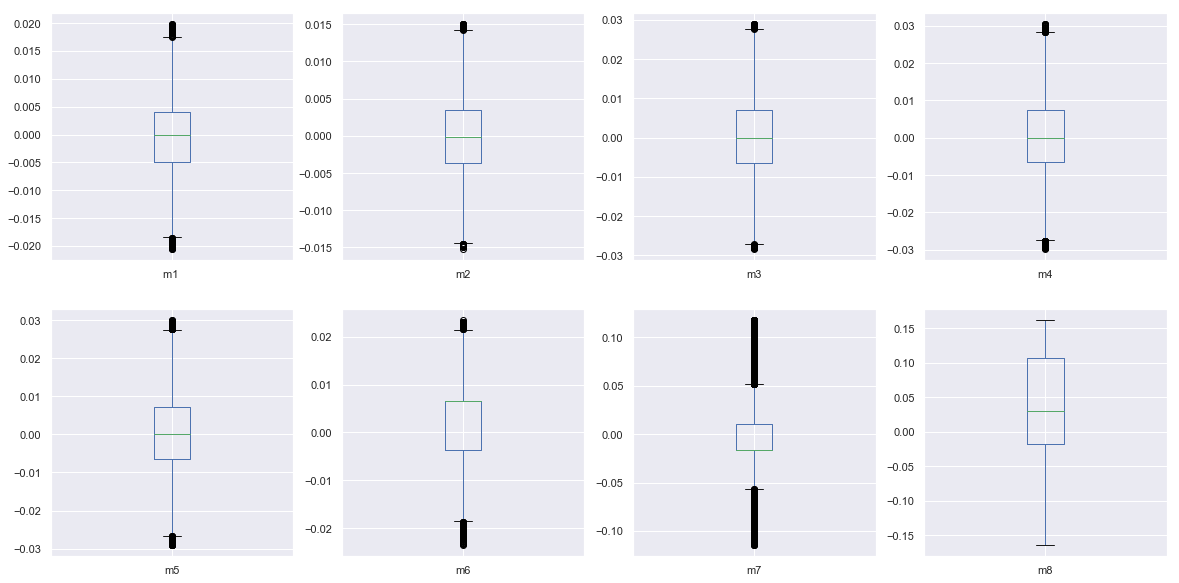

In [45]:
market_data.plot(kind='box', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

## Adding features

In [46]:
f0=md_no_change.pct_change(periods=1).fillna(method='bfill')
f1=md_no_change.pct_change(periods=5).fillna(method='bfill')
f2=md_no_change.pct_change(periods=10).fillna(method='bfill')
f3=md_no_change.pct_change(periods=30).fillna(method='bfill')

In [21]:
f4=f0.rolling(5).mean().fillna(method='bfill')
f5=f0.rolling(10).mean().fillna(method='bfill')
f6=f0.rolling(30).mean().fillna(method='bfill')

In [22]:
market_data[['m'+str(i)+'_pct_change_5' for i in range(1,9)]]=f1
market_data[['m'+str(i)+'_pct_change_10' for i in range(1,9)]]=f2
market_data[['m'+str(i)+'_pct_change_30' for i in range(1,9)]]=f3

market_data[['m'+str(i)+'_mva_5' for i in range(1,9)]]=f4
market_data[['m'+str(i)+'_mva_10' for i in range(1,9)]]=f5
market_data[['m'+str(i)+'_mva_30' for i in range(1,9)]]=f6

In [13]:
changes=market_data[['m'+str(i)+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'_pct_change_30' for i in range(1,9)]]

In [14]:
f4=changes.rolling(5).mean()
f5=changes.rolling(10).mean()
f6=changes.rolling(30).mean()

In [15]:
market_data[['m'+str(i)+'MV_5'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_5'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_5'+'_pct_change_30' for i in range(1,9)]]=f4
            
market_data[['m'+str(i)+'MV_10'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_10'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_10'+'_pct_change_30' for i in range(1,9)]]=f5

market_data[['m'+str(i)+'MV_30'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_30'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_30'+'_pct_change_30' for i in range(1,9)]]=f6

## Selecting features

In [82]:
def select_corr(data,threshold):
    corr=data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    data = data[selected_columns]
    return data

In [84]:
 select_corr(market_data,0.3).head()

,m1,m2,m3,m6,m7,m8
Date,,,,,,
2018-12-31,0.001403,-0.000273,0.018982,0.005495,-0.066667,0.019925
2018-12-28,0.001403,-0.000273,0.018982,0.005495,-0.066667,0.019925
2018-12-27,-0.010096,-0.001985,0.006774,-0.000607,0.000000,-0.018315
2018-12-26,-0.004762,0.004692,-0.006308,-0.010936,0.000000,0.043781
2018-12-25,-0.004762,-0.004247,0.000000,0.017199,0.000000,0.000000


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)

In [ ]:
print(np.mean(cross_val_score(LinearRegression(), X, y, cv=tscv, scroing='neg_mean_squared_error')))

## Elastic Net

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_actual, y_predicted))

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
alphas=np.linspace(-2, 2, 30)
ratios=np.linspace(0, 1, 10)

In [ ]:
params=({'alpha':alphas,
        'l1_ratio': ratios
        })

In [ ]:
mdl=GridSearchCV(ElasticNet(), params, cv=tscv,scroing='neg_mean_squared_error')

In [ ]:
mdl.fit(X_train,y_train)

In [ ]:
pred_en=mdl.best_estimator_.predict(X_test)

In [ ]:
rmse(y_test,pred_en)

## Gradient Boosting

In [90]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

In [91]:
n_estimators=range(100,1100,100)
learning_rates=np.linspace(0,1,10)
depth=range(2,10)

param_comb=10
# estimating only 10 combinations

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In [ ]:
params=({'learning_rate':learning_rates,
        'max_depth': depth,
         'n_estimators':n_estimators
        })

In [ ]:
xgb=xgb.XGBRegressor()

In [ ]:
random_search=RandomizedSearchCV(xgb, params,n_iter=param_comb, 
                                 scoring='neg_mean_squared_error',cv=tscv)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
print('Best score \n', random_search.best_score_,
      '\n \n Best parameters \n', random_search.best_params_,
      '\n \n Best estimator \n', random_search.best_estimator_)

In [ ]:
rmse(y_test,random_search.best_estimator_.predict(X_test))

In [ ]:
# feature importance plot as well

## Random Forest

In [104]:
[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [105]:
[int(x) for x in np.linspace(10, 110, num = 11)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [103]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

NameError: name 'pprint' is not defined